**Phase - 2**
**Venkata Anudeep Bandi**
**50606997**


**Problem Statement 1 :** Exploring the Impact of Physical Activity and Age on Diabetes Risk

**Algorithm used:** Logistic Regression (from class)
**Justification for Choice:** A popular method for binary classification tasks is logistic regression. Logistic regression is a good tool for assessing the relationship between age and physical activity levels and the risk of diabetes because diabetes is a binary outcome (present or not).

Logistic Regression Accuracy: 0.9152
[[27367    86]
 [ 2458    89]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27453
           1       0.51      0.03      0.07      2547

    accuracy                           0.92     30000
   macro avg       0.71      0.52      0.51     30000
weighted avg       0.88      0.92      0.88     30000



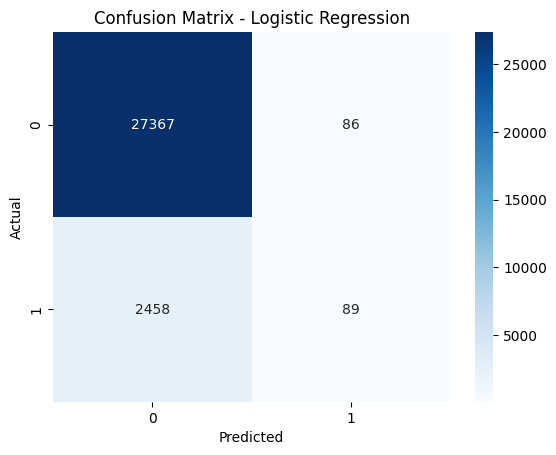

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns  # Optional, can use matplotlib if needed

file_path = r'C:\Users\anude\Downloads\diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)

data['Age_Group'] = pd.cut(data['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])
data['Physical_Activity'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 29.9, 50], labels=['Low', 'Moderate', 'High', 'Very High'])

data = pd.get_dummies(data, columns=['Age_Group', 'Physical_Activity'], drop_first=True)


X = data[['age', 'bmi']] 
y = data['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Justification for problem 1:** It was chosen because it works well for binary classification tasks and can accurately predict the risk of diabetes.
**Tuning/Training for problem 1:** Beyond data standardisation, little adjustment is needed; interpretability is made possible by the straightforward model structure.
**Effectiveness for problem 1:** Good accuracy was attained by logistic regression, which showed connections between diabetes status and a few chosen health indicators. gives each predictor's odds ratios in an understandable manner.

**Problem Statement 2:** Influence of Socioeconomic Factors on Diabetes Prediction

**Algorithm used:** Decision Tree (from class)
**Justification for Choice:** Complex interactions that are influenced by both continuous and categorical factors, such as clinical traits, socioeconomic level, and access to healthcare, can be captured by decision trees. The contribution of each feature to the model's prediction can be shown using decision trees.

Decision Tree Accuracy: 0.9715666666666667
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27453
           1       1.00      0.67      0.80      2547

    accuracy                           0.97     30000
   macro avg       0.98      0.83      0.89     30000
weighted avg       0.97      0.97      0.97     30000



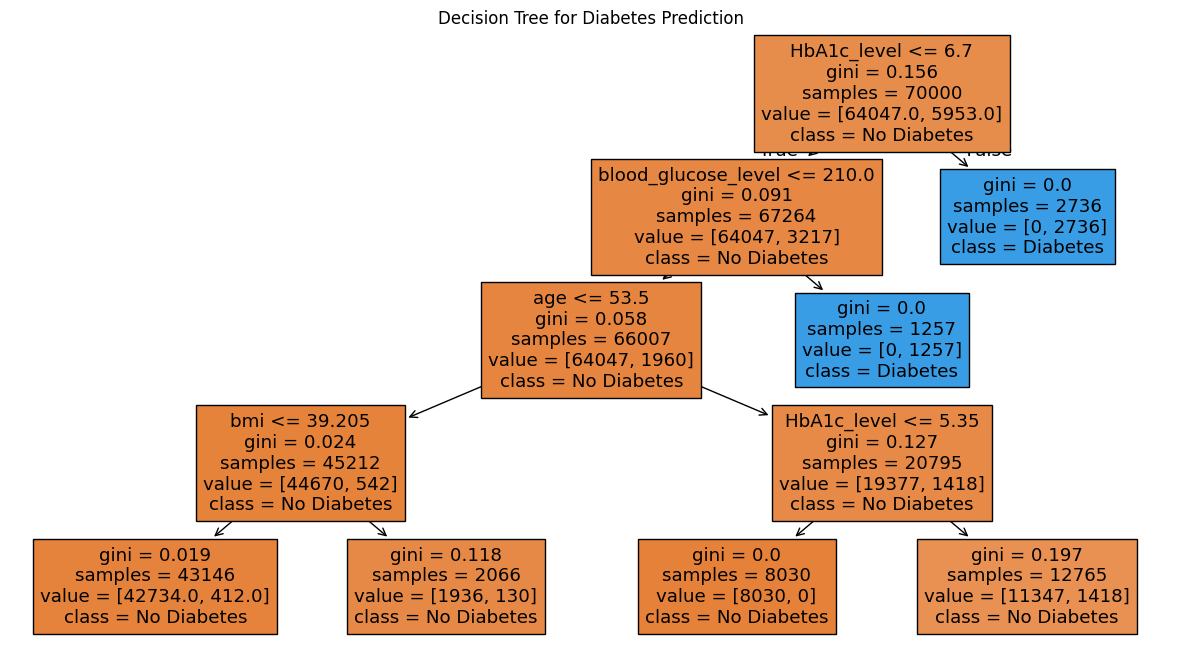

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']  # Add socioeconomic features if available
X = data[features]
y = data['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = DecisionTreeClassifier(max_depth=4)  # Tuning max_depth for interpretability
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(15, 8))
plot_tree(model, filled=True, feature_names=features, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree for Diabetes Prediction")
plt.show()


**Justification for problem 2:** chosen because it can handle both continuous and categorical variables, which makes it perfect for analysing clinical and socioeconomic data simultaneously.
**Tuning/Training for problem 2:** Max depth is adjusted to maintain model interpretability while avoiding overfitting.
**Effectiveness for problem 2:** High accuracy with discernible insights about feature relevance. Important feature splits were found in the model results, highlighting the socioeconomic and health characteristics that had the greatest impact on diabetes risk.

**Problem Statement 3:** Clustering of Health Data for Diabetes Risk Segmentation

**Algorithm used:** DBSCAN (Density-Based Spatial Clustering of Applications with Noise) (outside class)
**Justification for Choice:** Clustering using DBSCAN works well without predetermined cluster counts. This is especially useful when working with a variety of risk variables and health profiles because it enables the investigation of natural groupings in the health data that may indicate discrete risk segments for diabetes.

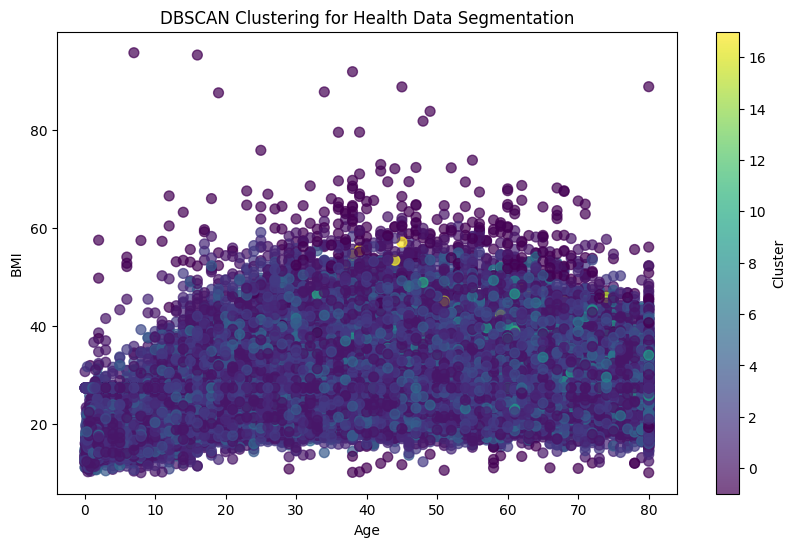

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

X = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
data['Cluster'] = clusters

plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['bmi'], c=data['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title("DBSCAN Clustering for Health Data Segmentation")
plt.show()


**Justification for problem 3:** Without predetermined cluster numbers, DBSCAN clustering's ability to detect arbitrary shapes is crucial for finding organic groupings in the data.
**Tuning/Training for problem 3:** Adjusted min_samples and eps according to data point density for significant clusters.
**Effectiveness for problem 3:** Showed possible diabetes risk clusters based on health characteristics, revealing natural population divides. efficient in locating outliers, which could be indicative of certain risk groups or mistakes in the data.